In [4]:
""" Import required packages """

import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [5]:
""" Create dataset as Pandas dataframe """

X = [2,4,7,12, 23,56,98, 123, 200]
y = [23, 32, 46, 39, 90, 155, 230, 295, 410]
df = pd.DataFrame()
df['X'] = X
df['y'] = y
#df = df.sort_values('X').copy()
print(df)
print('The dataframe has {} lines and {} columns'.format(df.shape[0], df.shape[1]))

     X    y
0    2   23
1    4   32
2    7   46
3   12   39
4   23   90
5   56  155
6   98  230
7  123  295
8  200  410
The dataframe has 9 lines and 2 columns


In [6]:
""" Compute linear OLS model  """

mod = sm.OLS(df['y'],sm.add_constant(df['X']))
res = mod.fit()

In [7]:
print(res.mse_model / res.mse_resid)

690.3967071090119


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     690.4
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           2.96e-08
Time:                        12:33:47   Log-Likelihood:                -35.861
No. Observations:                   9   AIC:                             75.72
Df Residuals:                       7   BIC:                             76.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6649      6.608      4.641      0.0

/home/grominou/Documents/Git_Projects/LinearModels/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


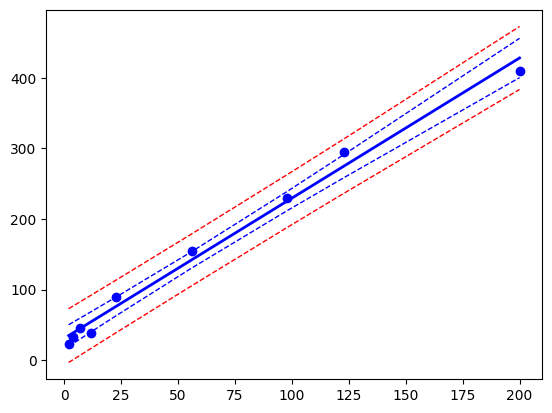

In [8]:
print(res.summary())
predictions = res.get_prediction()
prediction_summary = predictions.summary_frame(alpha=0.05)
print(prediction_summary)
plt.plot(X, y, 'bo')
plt.plot(X, prediction_summary['mean'], 'b-', lw=2)
plt.plot(X, prediction_summary['obs_ci_lower'], 'r--', lw=1)
plt.plot(X, prediction_summary['obs_ci_upper'], 'r--', lw=1)
plt.plot(X, prediction_summary['mean_ci_lower'], 'b--', lw=1)
plt.plot(X, prediction_summary['mean_ci_upper'], 'b--', lw=1)

In [9]:
data_test = pd.DataFrame()
data_test['X'] = [0, 110]
print(data_test)
data_test = sm.add_constant(data_test['X'])
print(data_test)
test = mod.predict(res.params, data_test)
print(test)

     X
0    0
1  110
   const    X
0    1.0    0
1    1.0  110
[ 30.66493796 249.41105495]


In [10]:
inv_xtx = mod.normalized_cov_params
print(inv_xtx)
X_pred = data_test.to_numpy()
print(X_pred)
type(X_pred)

[[ 2.00690898e-01 -1.53565349e-03]
 [-1.53565349e-03  2.63254883e-05]]
[[  1.   0.]
 [  1. 110.]]


numpy.ndarray

In [11]:
n_pred = data_test.shape[0]
var_err = np.zeros((n_pred,))
for i in range(n_pred):
    tmp = X_pred[i,:]
    pm = np.dot(np.dot(tmp, inv_xtx), np.transpose(tmp))
    var_err[i] = res.scale * (1 + pm)
print(var_err)

[261.24705634 257.04658477]


In [12]:
n = df.shape[0]
p = 1
qt = scipy.stats.t.ppf(0.975, df = n-p-1)

In [13]:
yb = test - qt * np.sqrt(var_err)
print(yb)
yh = test + qt * np.sqrt(var_err)
print(yh)

[ -7.55481206 211.49980894]
[ 68.88468798 287.32230096]


In [14]:
err = test - yb
print(err)

[38.21975002 37.91124601]


<ErrorbarContainer object of 3 artists>

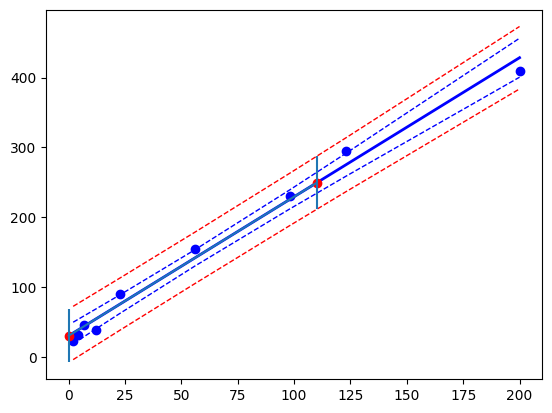

In [15]:
plt.plot(X, y, 'bo')
plt.plot(X, prediction_summary['mean'], 'b-', lw=2)
plt.plot(X, prediction_summary['obs_ci_lower'], 'r--', lw=1)
plt.plot(X, prediction_summary['obs_ci_upper'], 'r--', lw=1)
plt.plot(X, prediction_summary['mean_ci_lower'], 'b--', lw=1)
plt.plot(X, prediction_summary['mean_ci_upper'], 'b--', lw=1)
plt.plot(data_test['X'], test, 'ro')
plt.errorbar(data_test['X'], test, err)

In [18]:
""" Simplified version with a fucntion for prediction """

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Exemple de données
X = [2,4,7,12, 23,56,98, 123, 200]
y = [23, 32, 46, 39, 90, 155, 230, 295, 410]

# Création du modèle
X = sm.add_constant(X)  # Ajouter une constante au modèle
model = sm.OLS(y, X)
res = model.fit()

# Fonction pour prédire avec erreur
def predict_with_error(new_x, X, y):
    # Ajout manuel de la constante à new_x
    new_x_with_const = np.array([[1, new_x]])  # La constante (1) est ajoutée manuellement

    # Obtenir les prédictions et les intervalles de confiance
    prediction = res.get_prediction(new_x_with_const)
    pred_summary = prediction.summary_frame(alpha=0.05)  # Intervalle de confiance à 95%
    
    return pred_summary['mean'][0], pred_summary['obs_ci_lower'][0], pred_summary['obs_ci_upper'][0]

# Exemple de prédiction pour une nouvelle valeur
new_x = 110
prediction, lower_bound, upper_bound = predict_with_error(new_x, X, y)

# Affichage des résultats
print(f"Prédiction: {prediction}")
print(f"Limite inférieure: {lower_bound}")
print(f"Limite supérieure: {upper_bound}")


Prédiction: 249.41105495006929
Limite inférieure: 211.4998089392492
Limite supérieure: 287.3223009608894
